# Acurracy and runtime analyse of NOTEARS non-linear implementation using tensorflow.

To analyse the method, I'll test varying the number of variables in $[2, 5, 10, 15, 25, 50]$ and varying the number of samples in $[100, 1000, 10000]$.

In [6]:
from utils import simulate_dag, simulate_nonlinear_sem
from notears_nonlinear import notearsnonlinear
import matplotlib.pyplot as plt
import time
import tensorflow as tf
import numpy as np

In [5]:
execution_times = []
for n_variables in [2, 5, 10, 15, 25, 50]:
  for n_samples in [100, 1000, 10000]:
    G = simulate_dag(n_variables, 2*n_variables -1)
    data = simulate_nonlinear_sem(G, n_variables)
    start_time = time.time()
    W = notearsnonlinear([n_variables, n_variables*2, 1], tf.constant(data, tf.float32))
    end_time = time.time()
    execution_times.append((n_variables, n_samples, end_time - start_time))

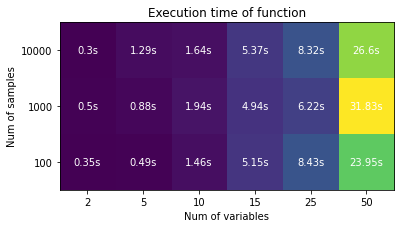

In [24]:
n_variables_list = [2, 5, 10, 15, 25, 50]
n_samples_list = [100, 1000, 10000]
execution_times_matrix = np.round(np.reshape(np.array([i[2] for i in execution_times]), (6, 3)), 2)
execution_times_matrix = np.transpose(np.flip(execution_times_matrix, 1))
fig, ax = plt.subplots()
im = ax.imshow(execution_times_matrix)
ax.set_yticks(np.arange(len(n_samples_list)))
ax.set_xticks(np.arange(len(n_variables_list)))
n_samples_list.reverse()
ax.set_yticklabels(n_samples_list)
ax.set_xticklabels(n_variables_list)
ax.set_ylabel("Num of samples")
ax.set_xlabel("Num of variables")

for i in range(len(n_samples_list)):
    for j in range(len(n_variables_list)):
        text = ax.text(j, i, str(execution_times_matrix[i, j]) + 's',
                       ha="center", va="center", color="w")

ax.set_title("Execution time of function")
plt.show()

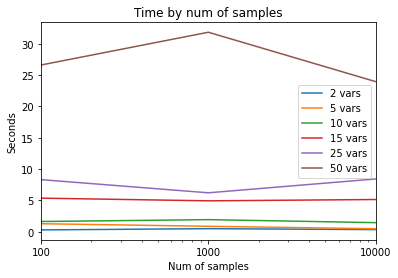

In [41]:
n_samples_list = [100, 1000, 10000]
plt.plot(n_samples_list, execution_times_matrix[:,0], label = "2 vars")
plt.plot(n_samples_list, execution_times_matrix[:,1], label = "5 vars")
plt.plot(n_samples_list, execution_times_matrix[:,2], label = "10 vars")
plt.plot(n_samples_list, execution_times_matrix[:,3], label = "15 vars")
plt.plot(n_samples_list, execution_times_matrix[:,4], label = "25 vars")
plt.plot(n_samples_list, execution_times_matrix[:,5], label = "50 vars")
plt.xlim(100, 10000)
plt.xscale('log')
plt.xticks(ticks = n_samples_list, labels = n_samples_list)
plt.title("Time by num of samples")
plt.ylabel("Seconds")
plt.xlabel("Num of samples")
plt.legend()
plt.show()

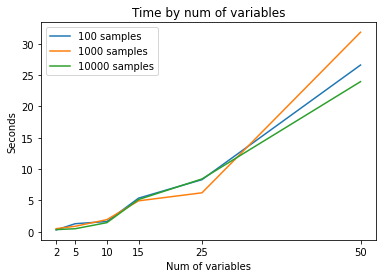

In [43]:
n_variables_list = [2, 5, 10, 15, 25, 50]
plt.plot(n_variables_list, execution_times_matrix[0], label = "100 samples")
plt.plot(n_variables_list, execution_times_matrix[1], label = "1000 samples")
plt.plot(n_variables_list, execution_times_matrix[2], label = "10000 samples")
plt.xticks(ticks = n_variables_list, labels= n_variables_list)
plt.ylabel("Seconds")
plt.xlabel("Num of variables")
plt.title("Time by num of variables")
plt.legend()
plt.show()